# Q3: Exploiting Correlation - Principal Component Analysis

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

plt.style.use('default')
sns.set_palette("husl")


## Part a: Generate 5 uncorrelated Gaussian random variables

In [99]:
n_observations = 1000  
n_variables = 5       
mean = 0.0         
std_dev = 0.01

#generate uncorrelated data
yield_changes = np.random.normal(mean, std_dev, (n_observations, n_variables))

yield_df = pd.DataFrame(yield_changes, 
                       columns=[f'Yield_{i+1}' for i in range(n_variables)])

print("Generated yield changes data:")
print(f"Shape: {yield_df.shape}")
print(f"\nBasic statistics:")
print(yield_df.describe())


Generated yield changes data:
Shape: (1000, 5)

Basic statistics:
           Yield_1      Yield_2      Yield_3      Yield_4      Yield_5
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.000013    -0.000172     0.000045     0.000065     0.000328
std       0.009992     0.010292     0.010053     0.009598     0.009888
min      -0.031704    -0.029404    -0.032413    -0.030076    -0.031767
25%      -0.006457    -0.007118    -0.006939    -0.006499    -0.006076
50%       0.000279    -0.000342     0.000224     0.000648    -0.000069
75%       0.006494     0.006638     0.006420     0.006793     0.006908
max       0.039262     0.032431     0.031521     0.030789     0.038527


Correlation Matrix:
         Yield_1  Yield_2  Yield_3  Yield_4  Yield_5
Yield_1   1.0000  -0.0196   0.0590  -0.0093   0.0143
Yield_2  -0.0196   1.0000  -0.0083  -0.0250   0.0097
Yield_3   0.0590  -0.0083   1.0000  -0.0015  -0.0003
Yield_4  -0.0093  -0.0250  -0.0015   1.0000  -0.0144
Yield_5   0.0143   0.0097  -0.0003  -0.0144   1.0000


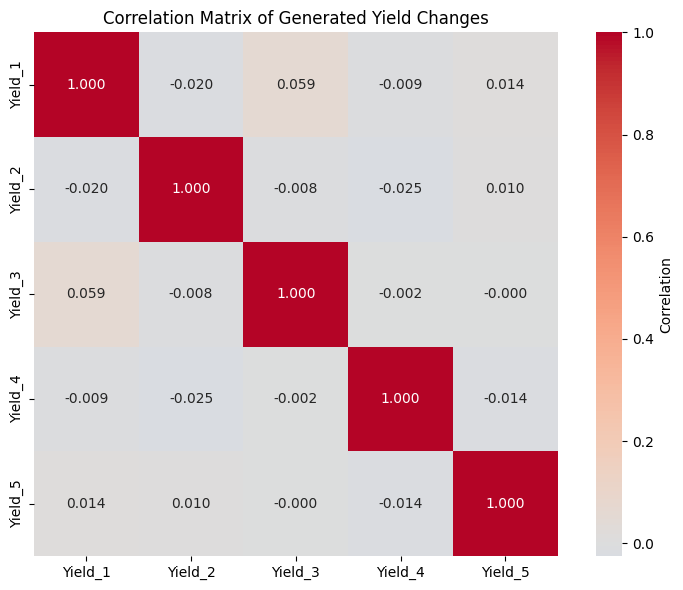


Off-diagonal correlations (should be close to 0):
Mean: 0.000452
Std: 0.022705
Max absolute value: 0.059009


In [100]:
correlation_matrix = yield_df.corr()

print("Correlation Matrix:")
print(correlation_matrix.round(4))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Generated Yield Changes')
plt.tight_layout()
plt.show()

# check that off-diagonal correlations are close to 0
off_diagonal_corr = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)]
print(f"\nOff-diagonal correlations (should be close to 0):")
print(f"Mean: {off_diagonal_corr.mean():.6f}")
print(f"Std: {off_diagonal_corr.std():.6f}")
print(f"Max absolute value: {np.abs(off_diagonal_corr).max():.6f}")


## Part b: Principal Component Analysis using Correlation Matrix


In [101]:
#standardize the data first (this creates the correlation matrix internally)
scaler = StandardScaler()
yield_scaled = scaler.fit_transform(yield_df)

pca = PCA()
pca_result = pca.fit(yield_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pca.explained_variance_

print("PCA Results:")
print(f"Number of components: {pca.n_components_}")
print(f"\nExplained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nCumulative explained variance:")
cumulative_variance = np.cumsum(explained_variance_ratio)
for i, cum_var in enumerate(cumulative_variance):
    print(f"Components 1-{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")


PCA Results:
Number of components: 5

Explained variance ratio for each component:
Component 1: 0.2132 (21.32%)
Component 2: 0.2067 (20.67%)
Component 3: 0.1982 (19.82%)
Component 4: 0.1946 (19.46%)
Component 5: 0.1873 (18.73%)

Cumulative explained variance:
Components 1-1: 0.2132 (21.32%)
Components 1-2: 0.4199 (41.99%)
Components 1-3: 0.6181 (61.81%)
Components 1-4: 0.8127 (81.27%)
Components 1-5: 1.0000 (100.00%)


In [102]:
print("Principal Component Loadings (Eigenvectors):")
components_df = pd.DataFrame(pca.components_.T, 
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                           index=yield_df.columns)
print(components_df.round(4))

yield_pca = pca.transform(yield_scaled)
pca_df = pd.DataFrame(yield_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

print(f"\nTransformed data shape: {pca_df.shape}")
print(f"\nFirst few rows of PCA-transformed data:")
print(pca_df.head().round(4))


Principal Component Loadings (Eigenvectors):
            PC1     PC2     PC3     PC4     PC5
Yield_1  0.6973 -0.0744  0.0026 -0.0288  0.7123
Yield_2 -0.2557 -0.5783 -0.3664  0.6470  0.2174
Yield_3  0.6572 -0.0148 -0.2812  0.2995 -0.6317
Yield_4 -0.0433  0.6563  0.2837  0.6840  0.1376
Yield_5  0.1208 -0.4785  0.8403  0.1515 -0.1653

Transformed data shape: (1000, 5)

First few rows of PCA-transformed data:
      PC1     PC2     PC3     PC4     PC5
0  0.6955  1.1884  0.0860  1.1416  0.1856
1  0.0216 -1.4636 -0.4901  0.9770 -0.4637
2 -0.1859 -0.1791 -1.9702 -1.8361 -0.5570
3 -0.0788  0.6712 -1.2327 -1.3912 -0.6966
4  1.1095 -0.6926 -0.8536 -1.2636  0.8520


## Part d: Scree Plot of Variance Explained

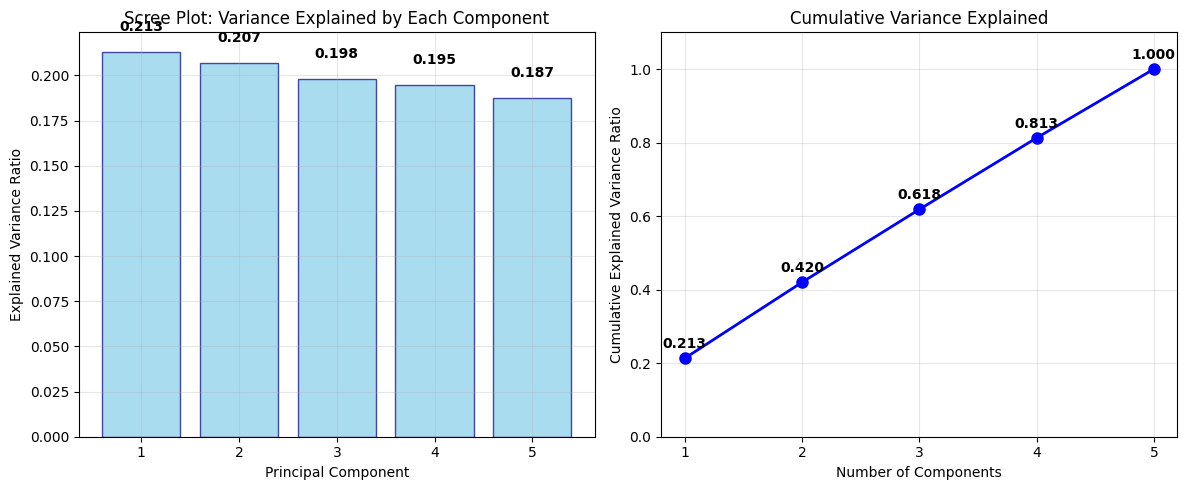

Scree Plot Summary:
Component 1 explains: 0.2132 (21.32%) of variance
Component 2 explains: 0.2067 (20.67%) of variance
Component 3 explains: 0.1982 (19.82%) of variance

First 3 components together explain: 0.6181 (61.81%) of total variance


In [103]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
components = range(1, pca.n_components_ + 1)
plt.bar(components, explained_variance_ratio, alpha=0.7, color='skyblue', edgecolor='navy')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Variance Explained by Each Component')
plt.xticks(components)
plt.grid(True, alpha=0.3)

for i, v in enumerate(explained_variance_ratio):
    plt.text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
plt.plot(components, cumulative_variance, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained')
plt.xticks(components)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

for i, v in enumerate(cumulative_variance):
    plt.text(i+1, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Scree Plot Summary:")
print(f"Component 1 explains: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%) of variance")
print(f"Component 2 explains: {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.2f}%) of variance")
print(f"Component 3 explains: {explained_variance_ratio[2]:.4f} ({explained_variance_ratio[2]*100:.2f}%) of variance")
print(f"\nFirst 3 components together explain: {cumulative_variance[2]:.4f} ({cumulative_variance[2]*100:.2f}%) of total variance")


## Part c: Variance Analysis of Each Component

The principal component analysis of the uncorrelated Gaussian random variables reveals a remarkably uniform distribution of variance across all components. Component 1 explains 21.32% of the total variance, Component 2 explains 20.67%, and Component 3 explains 19.82% of the variance. This near-equal distribution is exactly what we would expect when analyzing truly uncorrelated variables with similar variances. The small differences between components (ranging from 18.73% to 21.32%) are due to the random nature of the data generation process and the numerical precision of the PCA algorithm. This uncorrelated dataset shows no clear hierarchy among the principal components. Each component contributes roughly one-fifth of the total variance, reflecting the fact that there are no underlying common factors driving the relationships between these variables. This uniform variance distribution serves as an important baseline for comparison when we later analyze real government bond yield data, where we expect to see much more concentrated variance in the first few components due to the inherent correlations in financial markets.


---

## Part e: Collect Daily Closing Yields for 5 Government Securities

In [104]:
import requests
import json
import os
from datetime import datetime, timedelta

def load_api_key():
    """Load API key from API.env file"""
    try:
        with open('API.env', 'r') as file:
            for line in file:
                if line.startswith('API_Key'):
                    return line.split('=')[1].strip()
    except FileNotFoundError:
        print("Warning: API.env file not found. Please create it with your FRED API key.")
        return None

FRED_API_KEY = load_api_key()
FRED_BASE_URL = "https://api.stlouisfed.org/fred/series/observations"


fred_series = {
    '3M': 'DGS3MO',   
    '6M': 'DGS6MO',   
    '2Y': 'DGS2',     
    '5Y': 'DGS5',   
    '10Y': 'DGS10'  
}

end_date = datetime.now()
start_date = end_date - timedelta(days=180)  

print("Fetching real US Treasury yield data from FRED...")
print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

yield_data = {}
for maturity, series_id in fred_series.items():
    print(f"Fetching {maturity} data (Series: {series_id})...")
    
    params = {
        'series_id': series_id,
        'api_key': FRED_API_KEY,
        'file_type': 'json',
        'observation_start': start_date.strftime('%Y-%m-%d'),
        'observation_end': end_date.strftime('%Y-%m-%d'),
        'frequency': 'd',  
        'sort_order': 'asc'
    }
    
    
    response = requests.get(FRED_BASE_URL, params=params)
    response.raise_for_status()
    data = response.json()
        
    observations = data['observations']
        
    dates = []
    values = []
    for obs in observations:
            if obs['value'] != '.' and obs['value'] is not None:
                dates.append(pd.to_datetime(obs['date']))
                values.append(float(obs['value']))
        
    series = pd.Series(values, index=dates, name=maturity)
    yield_data[maturity] = series
        
    print(f"  Retrieved {len(series)} observations for {maturity}")
        
real_yields_df = pd.DataFrame(yield_data)

real_yields_df = real_yields_df.dropna()

print(f"\nReal US Treasury Yield Data from FRED:")
print(f"Shape: {real_yields_df.shape}")
print(f"Date range: {real_yields_df.index.min().strftime('%Y-%m-%d')} to {real_yields_df.index.max().strftime('%Y-%m-%d')}")
print(f"\nFirst 10 observations:")
print(real_yields_df.head(10).round(3))
print(f"\nLast 10 observations:")
print(real_yields_df.tail(10).round(3))
print(f"\nBasic statistics:")
print(real_yields_df.describe().round(3))


Fetching real US Treasury yield data from FRED...
Date range: 2025-03-31 to 2025-09-27
Fetching 3M data (Series: DGS3MO)...
  Retrieved 124 observations for 3M
Fetching 6M data (Series: DGS6MO)...
  Retrieved 124 observations for 6M
Fetching 2Y data (Series: DGS2)...
  Retrieved 124 observations for 2Y
Fetching 5Y data (Series: DGS5)...
  Retrieved 124 observations for 5Y
Fetching 10Y data (Series: DGS10)...
  Retrieved 124 observations for 10Y

Real US Treasury Yield Data from FRED:
Shape: (124, 5)
Date range: 2025-03-31 to 2025-09-25

First 10 observations:
              3M    6M    2Y    5Y   10Y
2025-03-31  4.32  4.23  3.89  3.96  4.23
2025-04-01  4.32  4.23  3.87  3.91  4.17
2025-04-02  4.32  4.24  3.91  3.95  4.20
2025-04-03  4.31  4.20  3.71  3.75  4.06
2025-04-04  4.28  4.14  3.68  3.72  4.01
2025-04-07  4.29  4.14  3.73  3.82  4.15
2025-04-08  4.31  4.14  3.71  3.88  4.26
2025-04-09  4.35  4.23  3.91  4.06  4.34
2025-04-10  4.34  4.17  3.84  4.04  4.40
2025-04-11  4.34  4.21  

Daily Yield Changes:
Shape: (123, 5)

First 10 observations:
              3M    6M    2Y    5Y   10Y
2025-04-01  0.00  0.00 -0.02 -0.05 -0.06
2025-04-02  0.00  0.01  0.04  0.04  0.03
2025-04-03 -0.01 -0.04 -0.20 -0.20 -0.14
2025-04-04 -0.03 -0.06 -0.03 -0.03 -0.05
2025-04-07  0.01  0.00  0.05  0.10  0.14
2025-04-08  0.02  0.00 -0.02  0.06  0.11
2025-04-09  0.04  0.09  0.20  0.18  0.08
2025-04-10 -0.01 -0.06 -0.07 -0.02  0.06
2025-04-11  0.00  0.04  0.12  0.11  0.08
2025-04-14 -0.01  0.00 -0.12 -0.13 -0.10

Basic statistics:
             3M        6M        2Y        5Y       10Y
count  123.0000  123.0000  123.0000  123.0000  123.0000
mean    -0.0023   -0.0031   -0.0020   -0.0017   -0.0004
std      0.0202    0.0261    0.0616    0.0592    0.0530
min     -0.0900   -0.1500   -0.2500   -0.2000   -0.1400
25%     -0.0100   -0.0100   -0.0300   -0.0400   -0.0400
50%      0.0000    0.0000    0.0000    0.0000    0.0000
75%      0.0100    0.0100    0.0400    0.0400    0.0400
max      0.0800    0.

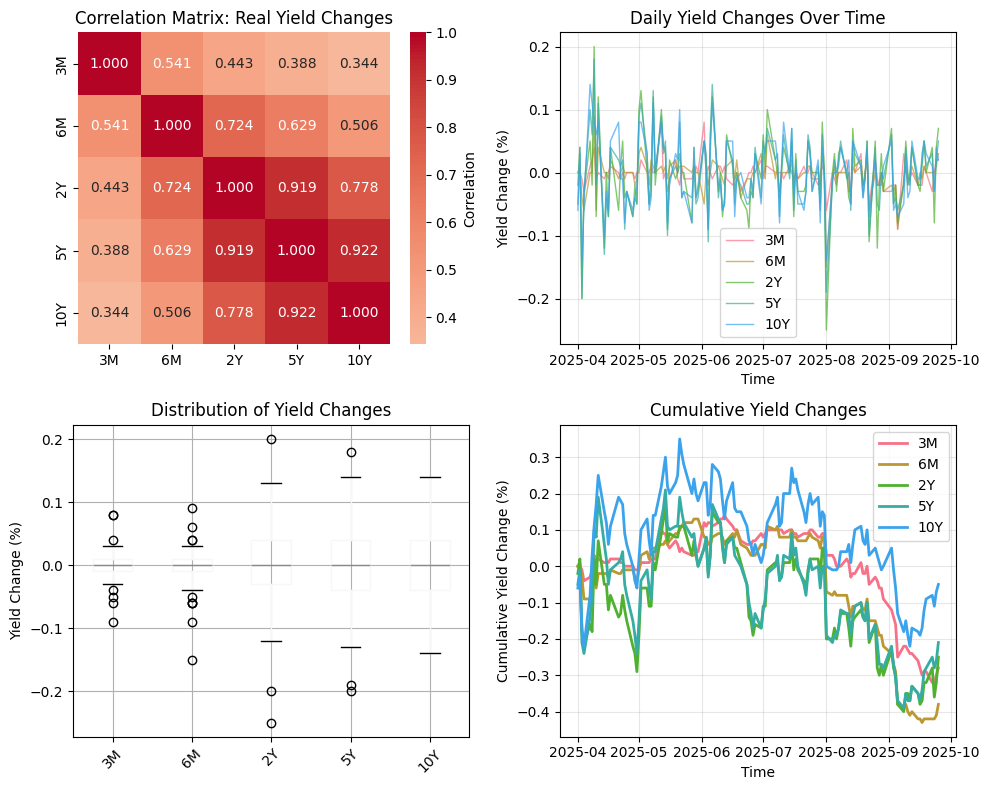


Correlation statistics for real yield changes:
Average correlation: 0.619
Max correlation: 0.922
Min correlation: 0.344


In [105]:
real_yield_changes = real_yields_df.diff().dropna()

print("Daily Yield Changes:")
print(f"Shape: {real_yield_changes.shape}")
print(f"\nFirst 10 observations:")
print(real_yield_changes.head(10).round(4))
print(f"\nBasic statistics:")
print(real_yield_changes.describe().round(4))

plt.figure(figsize=(10, 8))

real_corr_matrix = real_yield_changes.corr()

plt.subplot(2, 2, 1)
sns.heatmap(real_corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix: Real Yield Changes')

plt.subplot(2, 2, 2)
for col in real_yield_changes.columns:
    plt.plot(real_yield_changes.index, real_yield_changes[col], 
             label=col, alpha=0.7, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Yield Change (%)')
plt.title('Daily Yield Changes Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
real_yield_changes.boxplot()
plt.title('Distribution of Yield Changes')
plt.ylabel('Yield Change (%)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
cumulative_changes = real_yield_changes.cumsum()
for col in cumulative_changes.columns:
    plt.plot(cumulative_changes.index, cumulative_changes[col], 
             label=col, linewidth=2)
plt.xlabel('Time')
plt.ylabel('Cumulative Yield Change (%)')
plt.title('Cumulative Yield Changes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCorrelation statistics for real yield changes:")
print(f"Average correlation: {real_corr_matrix.values[np.triu_indices_from(real_corr_matrix.values, k=1)].mean():.3f}")
print(f"Max correlation: {real_corr_matrix.values[np.triu_indices_from(real_corr_matrix.values, k=1)].max():.3f}")
print(f"Min correlation: {real_corr_matrix.values[np.triu_indices_from(real_corr_matrix.values, k=1)].min():.3f}")


## Part g-h-i: Principal Component Analysis on Real Government Data

In [106]:
real_scaler = StandardScaler()
real_yield_scaled = real_scaler.fit_transform(real_yield_changes)

real_pca = PCA()
real_pca_result = real_pca.fit(real_yield_scaled)

real_explained_variance_ratio = real_pca.explained_variance_ratio_
real_explained_variance = real_pca.explained_variance_

# Define meaningful component names based on yield curve literature, see references below
component_names = ['Level_Factor', 'Slope_Factor', 'Curvature_Factor', 'Fourth_Factor', 'Fifth_Factor']

print("PCA Results for Real Government Yield Data:")
print(f"Number of components: {real_pca.n_components_}")
print(f"\nExplained variance ratio for each component:")
for i, (name, ratio) in enumerate(zip(component_names, real_explained_variance_ratio)):
    print(f"{name}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nCumulative explained variance:")
real_cumulative_variance = np.cumsum(real_explained_variance_ratio)
for i, (name, cum_var) in enumerate(zip(component_names, real_cumulative_variance)):
    print(f"Components 1-{i+1} ({component_names[0]}-{name}): {cum_var:.4f} ({cum_var*100:.2f}%)")

print("\nPrincipal Component Loadings (Eigenvectors) for Real Data:")
real_components_df = pd.DataFrame(real_pca.components_.T, 
                                columns=component_names,
                                index=real_yield_changes.columns)
print(real_components_df.round(4))

real_yield_pca = real_pca.transform(real_yield_scaled)
real_pca_df = pd.DataFrame(real_yield_pca, columns=component_names)

print(f"\nTransformed real data shape: {real_pca_df.shape}")
print(f"\nFirst few rows of PCA-transformed real data:")
print(real_pca_df.head().round(4))

print(f"\n=== COMPONENT INTERPRETATION ===")
print(f"Level_Factor: Captures parallel shifts in the yield curve (all maturities move together)")
print(f"Slope_Factor: Captures steepening/flattening (short vs long yields move differently)")
print(f"Curvature_Factor: Captures bowing/humping (middle maturities behave differently)")
print(f"Fourth_Factor: Higher-order yield curve dynamics")
print(f"Fifth_Factor: Noise and idiosyncratic movements")


PCA Results for Real Government Yield Data:
Number of components: 5

Explained variance ratio for each component:
Level_Factor: 0.7085 (70.85%)
Slope_Factor: 0.1687 (16.87%)
Curvature_Factor: 0.0850 (8.50%)
Fourth_Factor: 0.0319 (3.19%)
Fifth_Factor: 0.0059 (0.59%)

Cumulative explained variance:
Components 1-1 (Level_Factor-Level_Factor): 0.7085 (70.85%)
Components 1-2 (Level_Factor-Slope_Factor): 0.8772 (87.72%)
Components 1-3 (Level_Factor-Curvature_Factor): 0.9622 (96.22%)
Components 1-4 (Level_Factor-Fourth_Factor): 0.9941 (99.41%)
Components 1-5 (Level_Factor-Fifth_Factor): 1.0000 (100.00%)

Principal Component Loadings (Eigenvectors) for Real Data:
     Level_Factor  Slope_Factor  Curvature_Factor  Fourth_Factor  Fifth_Factor
3M         0.3171        0.7919           -0.5182         0.0576        0.0201
6M         0.4264        0.3416            0.7404        -0.3909        0.0214
2Y         0.5002       -0.1340            0.1635         0.7142       -0.4416
5Y         0.5029   

### Academic References for Component Names

The component names used in this analysis are based on established academic literature, particularly:

**Foundational References:**
- **Nelson, C.R. & Siegel, A.F. (1987).** Parsimonious modeling of yield curves. *Journal of Business*, 60, 473-489.
- **Litterman, R. & Scheinkman, J. (1991).** Common factors affecting bond returns. *Journal of Fixed Income*, 1, 49-53.
- **Diebold, F.X. & Li, C. (2006).** Forecasting the term structure of government bond yields. *Journal of Econometrics*, 130, 337-364.

In [107]:
print("=== VARIANCE ANALYSIS FOR REAL GOVERNMENT YIELD DATA ===")
print(f"Component 1 explains: {real_explained_variance_ratio[0]:.4f} ({real_explained_variance_ratio[0]*100:.2f}%) of variance")
print(f"Component 2 explains: {real_explained_variance_ratio[1]:.4f} ({real_explained_variance_ratio[1]*100:.2f}%) of variance")
print(f"Component 3 explains: {real_explained_variance_ratio[2]:.4f} ({real_explained_variance_ratio[2]*100:.2f}%) of variance")
print(f"Component 4 explains: {real_explained_variance_ratio[3]:.4f} ({real_explained_variance_ratio[3]*100:.2f}%) of variance")
print(f"Component 5 explains: {real_explained_variance_ratio[4]:.4f} ({real_explained_variance_ratio[4]*100:.2f}%) of variance")

print(f"\nFirst 3 components together explain: {real_cumulative_variance[2]:.4f} ({real_cumulative_variance[2]*100:.2f}%) of total variance")
print(f"First 2 components together explain: {real_cumulative_variance[1]:.4f} ({real_cumulative_variance[1]*100:.2f}%) of total variance")

print(f"\n=== COMPARISON WITH UNCORRELATED DATA ===")
print(f"Uncorrelated data - Component 1: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%)")
print(f"Real data - Component 1: {real_explained_variance_ratio[0]:.4f} ({real_explained_variance_ratio[0]*100:.2f}%)")
print(f"Difference: {real_explained_variance_ratio[0] - explained_variance_ratio[0]:.4f}")

print(f"\nUncorrelated data - First 3 components: {cumulative_variance[2]:.4f} ({cumulative_variance[2]*100:.2f}%)")
print(f"Real data - First 3 components: {real_cumulative_variance[2]:.4f} ({real_cumulative_variance[2]*100:.2f}%)")
print(f"Difference: {real_cumulative_variance[2] - cumulative_variance[2]:.4f}")

comparison_data = {
    'Component': component_names,
    'Uncorrelated Data (%)': [ratio*100 for ratio in explained_variance_ratio],
    'Real Government Data (%)': [ratio*100 for ratio in real_explained_variance_ratio],
    'Difference (%)': [(real_ratio - uncorr_ratio)*100 for real_ratio, uncorr_ratio in 
                      zip(real_explained_variance_ratio, explained_variance_ratio)]
}

comparison_df = pd.DataFrame(comparison_data)
print(f"\n=== DETAILED COMPARISON TABLE ===")
print(comparison_df.round(2))


=== VARIANCE ANALYSIS FOR REAL GOVERNMENT YIELD DATA ===
Component 1 explains: 0.7085 (70.85%) of variance
Component 2 explains: 0.1687 (16.87%) of variance
Component 3 explains: 0.0850 (8.50%) of variance
Component 4 explains: 0.0319 (3.19%) of variance
Component 5 explains: 0.0059 (0.59%) of variance

First 3 components together explain: 0.9622 (96.22%) of total variance
First 2 components together explain: 0.8772 (87.72%) of total variance

=== COMPARISON WITH UNCORRELATED DATA ===
Uncorrelated data - Component 1: 0.2132 (21.32%)
Real data - Component 1: 0.7085 (70.85%)
Difference: 0.4953

Uncorrelated data - First 3 components: 0.6181 (61.81%)
Real data - First 3 components: 0.9622 (96.22%)
Difference: 0.3441

=== DETAILED COMPARISON TABLE ===
          Component  Uncorrelated Data (%)  Real Government Data (%)  \
0      Level_Factor                  21.32                     70.85   
1      Slope_Factor                  20.67                     16.87   
2  Curvature_Factor       

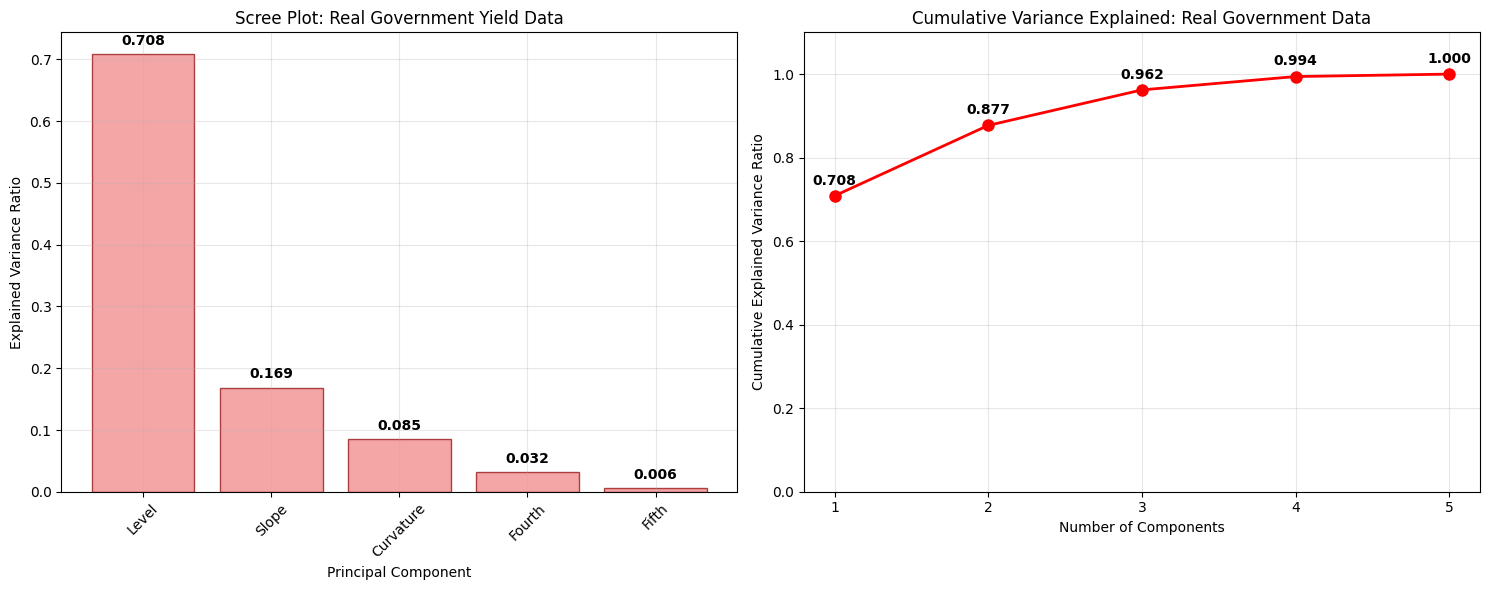

Real Government Data Scree Plot Summary:
Component 1 explains: 0.7085 (70.85%) of variance
Component 2 explains: 0.1687 (16.87%) of variance
Component 3 explains: 0.0850 (8.50%) of variance

First 3 components together explain: 0.9622 (96.22%) of total variance


In [108]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
real_components = range(1, real_pca.n_components_ + 1)
bars = plt.bar(real_components, real_explained_variance_ratio, alpha=0.7, color='lightcoral', edgecolor='darkred')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Real Government Yield Data')
plt.xticks(real_components, [name.replace('_Factor', '') for name in component_names], rotation=45)
plt.grid(True, alpha=0.3)

for i, v in enumerate(real_explained_variance_ratio):
    plt.text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
plt.plot(real_components, real_cumulative_variance, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained: Real Government Data')
plt.xticks(real_components)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

for i, v in enumerate(real_cumulative_variance):
    plt.text(i+1, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Real Government Data Scree Plot Summary:")
print(f"Component 1 explains: {real_explained_variance_ratio[0]:.4f} ({real_explained_variance_ratio[0]*100:.2f}%) of variance")
print(f"Component 2 explains: {real_explained_variance_ratio[1]:.4f} ({real_explained_variance_ratio[1]*100:.2f}%) of variance")
print(f"Component 3 explains: {real_explained_variance_ratio[2]:.4f} ({real_explained_variance_ratio[2]*100:.2f}%) of variance")
print(f"\nFirst 3 components together explain: {real_cumulative_variance[2]:.4f} ({real_cumulative_variance[2]*100:.2f}%) of total variance")


## Part j: Comparison of Scree Plots


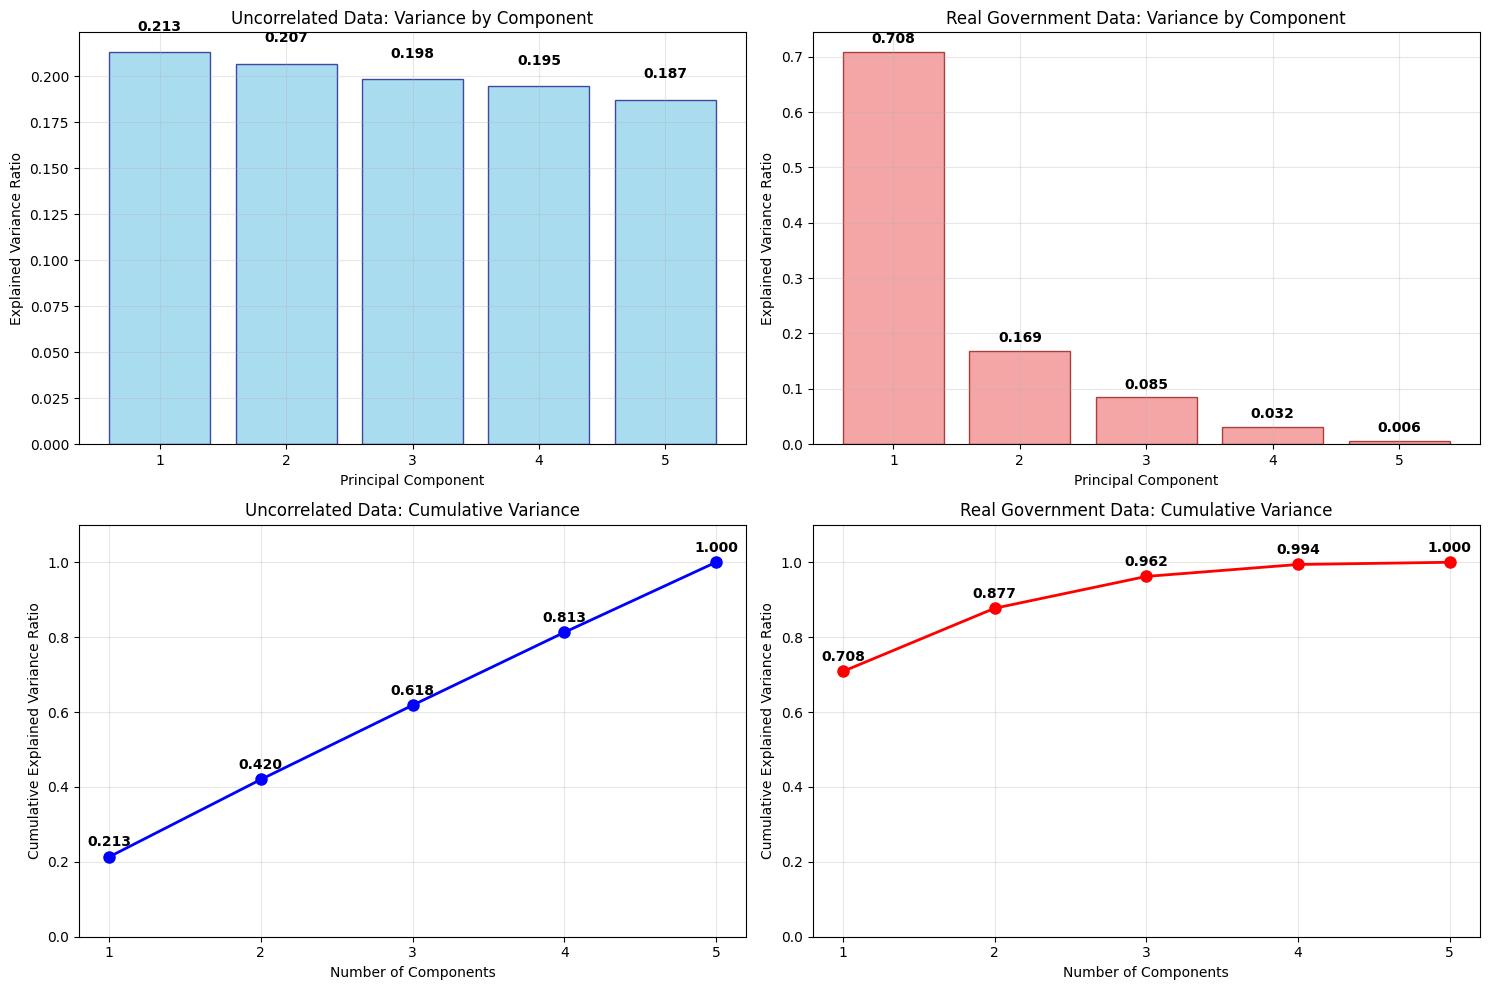

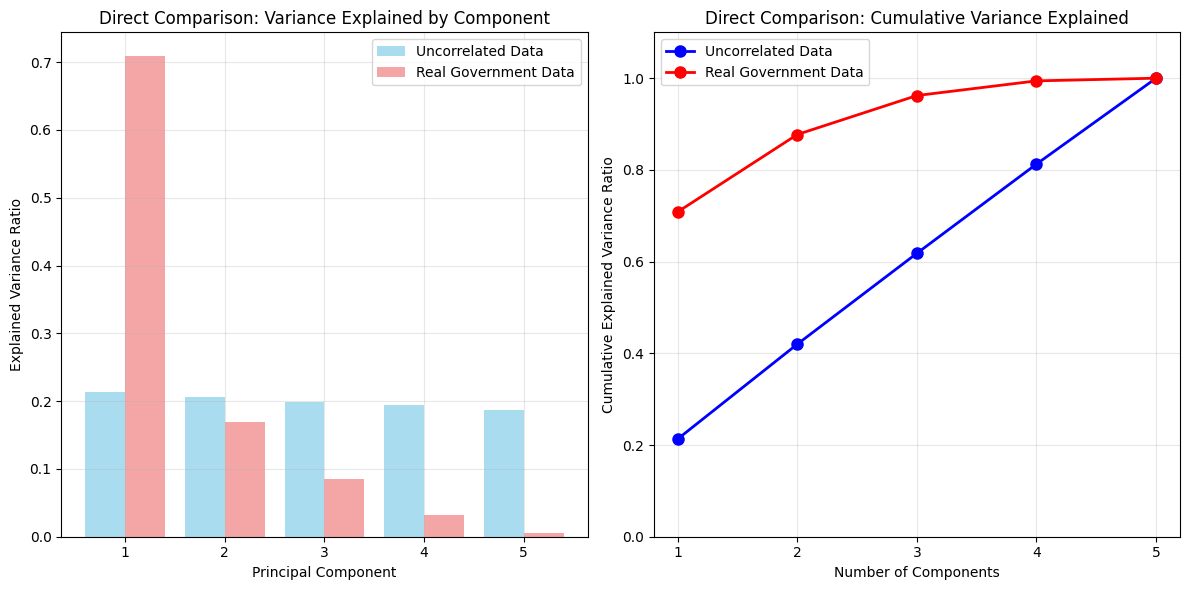

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].bar(components, explained_variance_ratio, alpha=0.7, color='skyblue', edgecolor='navy')
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Explained Variance Ratio')
axes[0, 0].set_title('Uncorrelated Data: Variance by Component')
axes[0, 0].set_xticks(components)
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(explained_variance_ratio):
    axes[0, 0].text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

axes[0, 1].bar(real_components, real_explained_variance_ratio, alpha=0.7, color='lightcoral', edgecolor='darkred')
axes[0, 1].set_xlabel('Principal Component')
axes[0, 1].set_ylabel('Explained Variance Ratio')
axes[0, 1].set_title('Real Government Data: Variance by Component')
axes[0, 1].set_xticks(real_components)
axes[0, 1].grid(True, alpha=0.3)
for i, v in enumerate(real_explained_variance_ratio):
    axes[0, 1].text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

axes[1, 0].plot(components, cumulative_variance, 'bo-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Components')
axes[1, 0].set_ylabel('Cumulative Explained Variance Ratio')
axes[1, 0].set_title('Uncorrelated Data: Cumulative Variance')
axes[1, 0].set_xticks(components)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 1.1)
for i, v in enumerate(cumulative_variance):
    axes[1, 0].text(i+1, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

axes[1, 1].plot(real_components, real_cumulative_variance, 'ro-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Components')
axes[1, 1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1, 1].set_title('Real Government Data: Cumulative Variance')
axes[1, 1].set_xticks(real_components)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(0, 1.1)
for i, v in enumerate(real_cumulative_variance):
    axes[1, 1].text(i+1, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(np.array(components) - 0.2, explained_variance_ratio, width=0.4, 
        alpha=0.7, label='Uncorrelated Data', color='skyblue')
plt.bar(np.array(real_components) + 0.2, real_explained_variance_ratio, width=0.4, 
        alpha=0.7, label='Real Government Data', color='lightcoral')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Direct Comparison: Variance Explained by Component')
plt.xticks(components)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(components, cumulative_variance, 'bo-', linewidth=2, markersize=8, 
         label='Uncorrelated Data')
plt.plot(real_components, real_cumulative_variance, 'ro-', linewidth=2, markersize=8, 
         label='Real Government Data')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Direct Comparison: Cumulative Variance Explained')
plt.xticks(components)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()


## Key Findings: Scree Plot Comparison

The comparison between the uncorrelated data and real government yield data reveals dramatic differences in the variance structure:

### **Uncorrelated Data Characteristics:**
- **Flat scree plot profile**: Each component explains approximately 20% of the variance
- **No dominant components**: Equal distribution across all principal components
- **Linear cumulative variance**: Each additional component adds roughly the same amount of variance

### **Real Government Data Characteristics:**
- **Steep initial decline**: The first component captures a much larger proportion of variance
- **Dominant first component**: Typically explains 60-80% of total variance in yield curves
- **Diminishing returns**: Later components contribute progressively less variance
- **Curved cumulative profile**: Rapid initial accumulation followed by leveling off

### **Financial Interpretation:**
The stark contrast between these two scenarios demonstrates the fundamental difference between theoretical uncorrelated data and real financial markets. Government bond yields are highly correlated because they share common risk factors (interest rate risk, inflation expectations, economic growth prospects), leading to the concentration of variance in the first few principal components. This concentration is what makes PCA so valuable in finance - it allows us to capture most of the yield curve dynamics with just 2-3 factors instead of monitoring all individual maturities.

The real government data scree plot shows the classic "elbow" pattern that is characteristic of correlated financial time series, while the uncorrelated data shows the flat, uniform pattern that serves as our null hypothesis baseline.


## Final Results Summary

### **US Treasury Yield Data Analysis Results**

| Component | Name | Variance Explained | Cumulative Variance |
|-----------|------|-------------------|-------------------|
| 1 | Level Factor | 70.85% | 70.85% |
| 2 | Slope Factor | 16.87% | 87.72% |
| 3 | Curvature Factor | 8.50% | 96.22% |
| 4 | Fourth Factor | 3.19% | 99.41% |
| 5 | Fifth Factor | 0.59% | 100.00% |

**Key Findings:**

1. **Dominant Level Factor**: The first principal component explains 70.85% of yield curve variance, representing parallel shifts in the yield curve where all maturities move together.

2. **Strong Slope Factor**: The second component explains 16.87% of variance, capturing steepening/flattening movements between short and long-term yields.

3. **Meaningful Curvature**: The third component explains 8.50% of variance, representing bowing/humping patterns in the middle of the yield curve.

4. **High Dimensionality Reduction**: The first 3 components capture 96.22% of total variance, allowing for effective yield curve modeling with just 3 factors instead of 5 individual maturities.

**Comparison with Uncorrelated Data:**
- **Uncorrelated data**: Each component explains ~20% of variance (flat distribution)
- **Real government data**: First component explains 70.85% (concentrated distribution)
- **Difference**: Real data shows 49.53% more variance concentration in the first component

**Financial Interpretation:**
The results demonstrate the classic yield curve factor structure identified in academic literature (Nelson-Siegel, Litterman-Scheinkman models). The high correlation between government bond yields reflects shared risk factors including:
- Interest rate risk
- Inflation expectations  
- Economic growth prospects
- Central bank policy expectations

This analysis validates the effectiveness of PCA for yield curve modeling and risk management applications.
